In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.power as smp
import scipy.stats
from scipy.stats import t, norm, ttest_ind, ttest_rel, ttest_1samp, pearsonr
import decimal
import random
decimal.getcontext().prec = 4
%matplotlib inline

In [2]:
def przedziały(x1,x2):
    r,p = pearsonr(x1,x2)
    n = len(x1)
    z = 1/2*np.log((1+r)/(1-r))
    a,b = z-t.ppf(1-0.1/2,df=n-2)*np.sqrt(1/(n-3)),z+t.ppf(1-0.05/2,df=n-2)*np.sqrt(1/(n-3))
    a = (np.exp(2*a)-1)/(np.exp(2*a)+1)
    b = (np.exp(2*b)-1)/(np.exp(2*b)+1)
    return a,b

In [3]:
def corr_test(sample1,sample2,delta,alternative = 'two-tailed'):
    corr,p = pearsonr(sample1,sample2)
    n = np.size(sample1)
    ts = (corr - delta)/np.sqrt((1- corr**2)/(np.size(sample1)-2))
    df = n-2
    if alternative == 'two-tailed':
        p_val = 2*t.sf(np.abs(ts),df)
    if alternative == 'greater':
        p_val = t.sf(ts,df)
    if alternative == 'less':
        p_val = t.cdf(ts, df)
    return p_val

In [7]:
sample1,sample2 = generate(100,0.5,10,10,2,2)

In [5]:
def get_normal_sample(n,mean,sd):
    return np.random.normal(loc=mean,scale=sd,size=n)

In [6]:
def generate(n,r,mean1,mean2,sd1,sd2):
    #r = 0.9
    s1 = np.array(get_normal_sample(n,mean1,sd1))
    s2 = np.array(get_normal_sample(n,mean2,sd2))
    s1 = (s1-np.mean(s1))/np.std(s1)
    s2 = (s2-np.mean(s2))/np.std(s2)
    a = r/np.sqrt(1-r**2)
    Z = a*s1 + s2
    X = s1*2+4
    return Z,X
Z,X = generate(40,0.3,40,40,2,2) 

In [8]:
przedziały(Z,X)


(0.29959908524624235, 0.7254508371291767)

In [9]:
def podejście2_przedziały(cor,n,delta):
    lst = []
    for i in range(10000):
        Z,X = generate(n,cor)
        a,b = przedziały(Z,X)
        if a >= 0:
            return 'd'
        elif a <0 and b >0:
            return 'nwd'
        else:
            return 'm'
    #return lst
    

In [10]:
def podejście3_przedziały(cor,n,delta):
    lst = []
    for i in range(10000):
        Z,X = generate(n,cor)
        a,b = przedziały(Z,X)
        if a >= delta:
            return 'd'
        elif a < delta and b > delta:
            return 'nwd'
        else:
            return 'm'
    #return lst
    

In [11]:
def podejście2(sample1,sample2,delta,alfa):
    cor,p = pearsonr(sample1,sample2)  
    #result = corr_test(sample1,sample2,0)
    #result1 = corr_test(sample1,sample2,delta,'greater')
    #result2 = corr_test(sample1,sample2,delta,'less')
    if p < alfa and cor > delta:
        return 'd'
    if p > alfa and cor < delta:
        return 'm'
    else:
        return 'nwd'
    

In [25]:
def podejście3(sample1,sample2,delta,alfa):
    cor,p = pearsonr(sample1,sample2)
    result1 = corr_test(sample1,sample2,delta,alternative='greater')
    result2 = corr_test(sample1,sample2,delta,alternative = 'less')
    
    if result1 < alfa and cor > delta:
        return 'd'
    if result2 < alfa and cor < delta:
        return 'm'
    else:
        return 'nwd'

In [26]:
dobrze_duże2 =[]
dobrze_duże3 =[]

źle_duże2 = []
źle_duże3 = []

niewiadomo_duże2 = []
niewiadomo_duże3 = []

dobrze_małe2 =[]
dobrze_małe3 =[]

źle_małe2 = []
źle_małe3 = []

niewiadomo_małe2 = []
niewiadomo_małe3 = []



delta = 0.5
n = 50
alfa = 0.05
rhos = []
sds = []
ns = []
for i in range(50):
    ns.append(40+5*i)
for sd in range(20,60):
    sd = sd*0.1
    for n in ns:
        sds.append(sd)
        app2 = []
        app3 = []
        for rho in range(1,100):
            rho = rho*0.01
            for i in range(1):
                z,x = generate(n,rho,10,10,sd,sd)
                pod2 = podejście2(z,x,delta,alfa)
                pod3 = podejście3(z,x,delta,alfa)
                app2.append([pod2,rho])
                app3.append([pod3,rho])
        
        # ile procent efektów które faktycznie były duże zostały wskazane przez test jako duże
        duże_dobrze2 = [i[1] for i in app2 if i[0] == 'd' and i[1] > delta]
        duże_dobrze3 = [i[1] for i in app3 if i[0] == 'd' and i[1] > delta]

        # ile procent efektów które faktycznie były małe zostały wskazane przez test jako duże
        duże_źle2 = [i[1] for i in app2 if i[0] == 'd' and i[1] <= delta]
        duże_źle3 = [i[1] for i in app3 if i[0] == 'd' and i[1] <= delta]

        # ile procent efektów które faktycznie były duże zostały wskazane przez test jako 'nie wiadomo'
        duże_niewiadomo2 = [i[1] for i in app2 if i[0] == 'nwd'and i[1] > delta]
        duże_niewiadomo3 = [i[1] for i in app3 if i[0] == 'nwd'and i[1] > delta]

        # ile procent efektów które faktycznie były małe zostały wskazane przez test jako małe
        małe_dobrze2 = [i[1] for i in app2 if i[0] == 'm' and i[1] <= delta]
        małe_dobrze3 = [i[1] for i in app3 if i[0] == 'm' and i[1] <= delta]

        # ile procent efektów które faktycznie były duże zostały wskazane przez test jako małe
        małe_źle2 = [i[1] for i in app2 if i[0] == 'm' and i[1] > delta]
        małe_źle3 = [i[1] for i in app3 if i[0] == 'm' and i[1] > delta]

        # ile procent efektów które faktycznie były małe zostały wskazane przez test jako 'nie wiadomo'
        małe_niewiadomo2 = [i[1] for i in app2 if i[0] == 'nwd'and i[1] <= delta]
        małe_niewiadomo3 = [i[1] for i in app3 if i[0] == 'nwd'and i[1] <= delta]

        #duże na teście i duże w rzeczywistości
        dobrze_duże2.append(len(duże_dobrze2)/len([i for i in app2 if i[1] > delta]))
        dobrze_duże3.append(len(duże_dobrze3)/len([i for i in app3 if i[1] > delta]))
        # duże na teście gdy w rzeczywistości jest małe
        źle_duże2.append((len(duże_źle2)/len([i for i in app2 if i[1] <= delta])))
        źle_duże3.append(len(duże_źle3)/len([i for i in app3 if i[1] <= delta]))
        # nie wiadomo gdy w rzeczywistości jest duże
        niewiadomo_duże2.append(len(duże_niewiadomo2)/len([i for i in app2 if i[1] > delta]))
        niewiadomo_duże3.append(len(duże_niewiadomo3)/len([i for i in app3 if i[1] > delta]))
        # małe na teście i w rzeczywistości
        dobrze_małe2.append(len(małe_dobrze2)/len([i for i in app2 if i[1] <= delta]))
        dobrze_małe3.append(len(małe_dobrze3)/len([i for i in app3 if i[1] <= delta]))
        # małe na teście, duże w rzeczywistości
        źle_małe2.append(len(małe_źle2)/len([i for i in app2 if i[1] > delta]))
        źle_małe3.append(len(małe_źle3)/len([i for i in app3 if i[1] > delta]))
        # nie wiadomo na teście, małe w rzeczywistości
        niewiadomo_małe2.append(len(małe_niewiadomo2)/len([i for i in app2 if i[1] <= delta]))
        niewiadomo_małe3.append(len(małe_niewiadomo3)/len([i for i in app3 if i[1] <= delta]))


In [14]:
nss = ns*40

In [27]:
dwa_podejścia = pd.DataFrame(zip(nss,sds,dobrze_duże2,dobrze_duże3,źle_duże2,źle_duże3,niewiadomo_duże2,niewiadomo_duże3,dobrze_małe2,dobrze_małe3,źle_małe2,źle_małe3,niewiadomo_małe2,niewiadomo_małe3),
                             columns = ['n','sd','efekt duży, podejście2','efekt duży, podejście3','źle_duże2','źle_duże3','nie wiadomo duże2','nie wiadomo duże3','mały_podejście2','mały_podejście3','źle_małe2','źle_małe3',
                                                                                 'niewiadomo_małe2','niewiadomo_małe3'])
dwa_podejścia

,n,sd,"efekt duży, podejście2","efekt duży, podejście3",źle_duże2,źle_duże3,nie wiadomo duże2,nie wiadomo duże3,mały_podejście2,mały_podejście3,źle_małe2,źle_małe3,niewiadomo_małe2,niewiadomo_małe3
0,40,2.0,0.959184,0.673469,0.06,0.0,0.040816,0.326531,0.64,0.46,0.0,0.0,0.30,0.54
1,45,2.0,0.918367,0.714286,0.10,0.0,0.081633,0.285714,0.50,0.42,0.0,0.0,0.40,0.58
2,50,2.0,0.959184,0.632653,0.06,0.0,0.040816,0.367347,0.52,0.48,0.0,0.0,0.42,0.52
3,55,2.0,0.938776,0.693878,0.00,0.0,0.061224,0.306122,0.52,0.54,0.0,0.0,0.48,0.46
4,60,2.0,0.979592,0.714286,0.08,0.0,0.020408,0.285714,0.52,0.56,0.0,0.0,0.40,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,265,5.9,0.979592,0.836735,0.02,0.0,0.020408,0.163265,0.24,0.78,0.0,0.0,0.74,0.22
1996,270,5.9,0.979592,0.877551,0.04,0.0,0.020408,0.122449,0.28,0.80,0.0,0.0,0.68,0.20
1997,275,5.9,1.000000,0.897959,0.00,0.0,0.000000,0.102041,0.28,0.78,0.0,0.0,0.72,0.22
1998,280,5.9,0.938776,0.877551,0.06,0.0,0.061224,0.122449,0.16,0.84,0.0,0.0,0.78,0.16


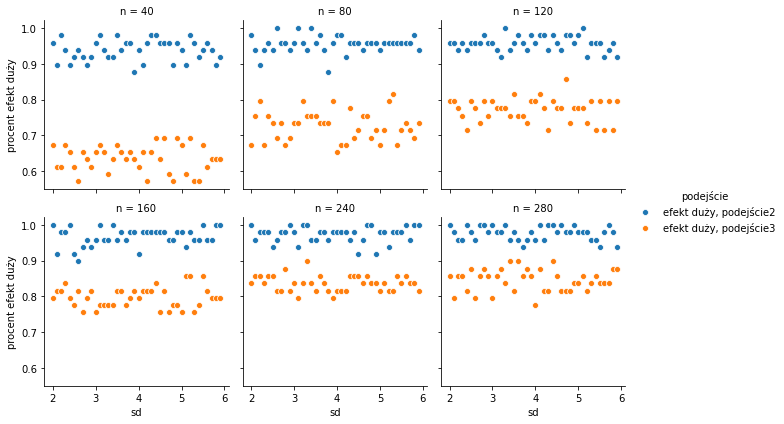

In [28]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży = ['efekt duży, podejście2','efekt duży, podejście3']

dt = dwa_podejścia[['n','sd','efekt duży, podejście2','efekt duży, podejście3']]
dtt = dt[dt['n'].isin([40,80,120,160,240,280])]
nowe = dtt.melt(value_vars=['efekt duży, podejście2','efekt duży, podejście3'],value_name='procent efekt duży',id_vars = ['n','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='n',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent efekt duży')
g.add_legend()
#g.set(xlabel = 'asd')

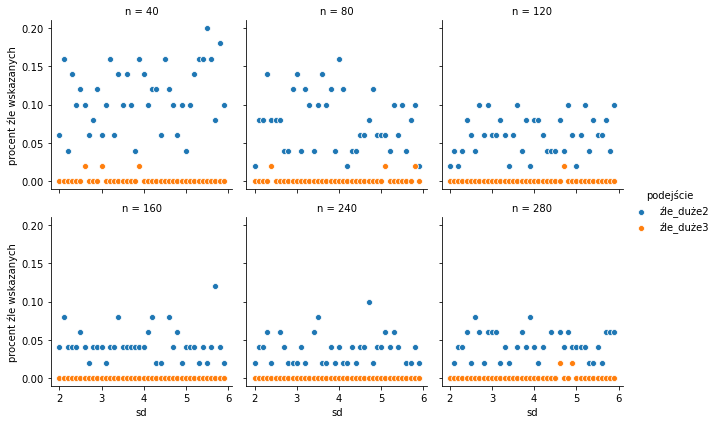

In [29]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_źle = ['źle_duże2','źle_duże3']
mały_dobrze = ['mały_podejście2','mały_podejście3']

dt = dwa_podejścia[['n','sd','źle_duże2','źle_duże3']]
dtt = dt[dt['n'].isin([40,80,120,160,240,280])]
nowe = dtt.melt(value_vars=['źle_duże2','źle_duże3'],value_name='procent źle wskazanych',id_vars = ['n','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='n',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent źle wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

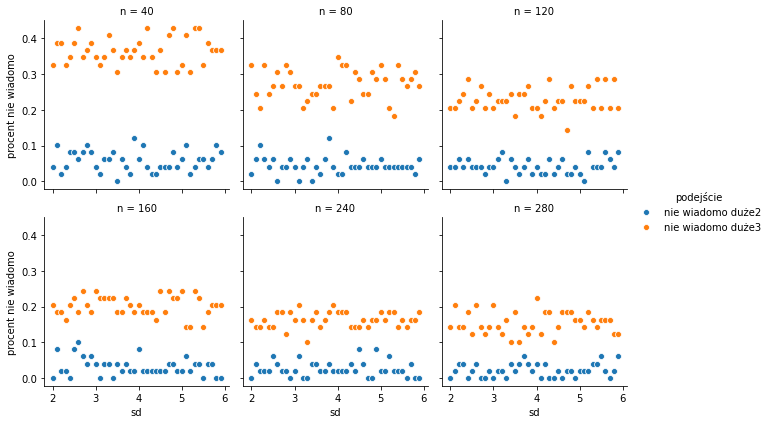

In [30]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_niewiadomo = ['nie wiadomo duże2','nie wiadomo duże3']

dt = dwa_podejścia[['n','sd','nie wiadomo duże2','nie wiadomo duże3']]
dtt = dt[dt['n'].isin([40,80,120,160,240,280])]
nowe = dtt.melt(value_vars=['nie wiadomo duże2','nie wiadomo duże3'],value_name='procent nie wiadomo',id_vars = ['n','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='n',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

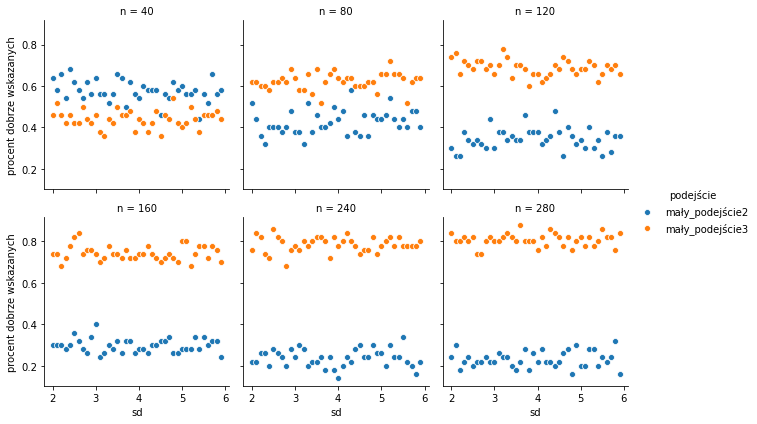

In [31]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_dobrze = ['mały_podejście2','mały_podejście3']

dt = dwa_podejścia[['n','sd','mały_podejście2','mały_podejście3']]
dtt = dt[dt['n'].isin([40,80,120,160,240,280])]
nowe = dtt.melt(value_vars=['mały_podejście2','mały_podejście3'],value_name='procent dobrze wskazanych',id_vars = ['n','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='n',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent dobrze wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

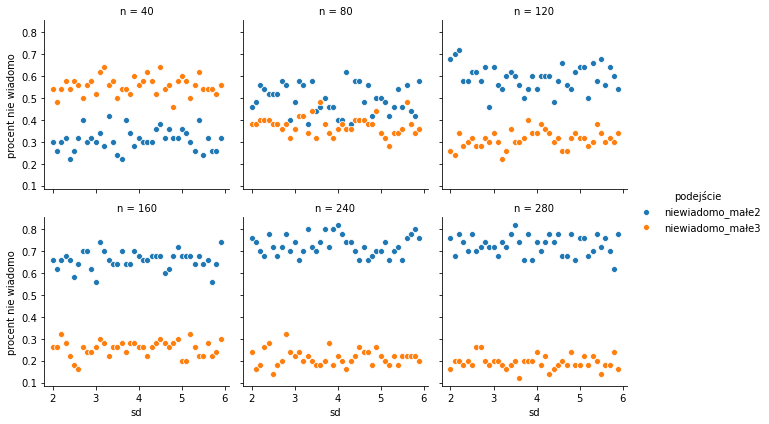

In [32]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_niewiadomo = ['niewiadomo_małe2','niewiadomo_małe3']

dt = dwa_podejścia[['n','sd','niewiadomo_małe2','niewiadomo_małe3']]
dtt = dt[dt['n'].isin([40,80,120,160,240,280])]
nowe = dtt.melt(value_vars=['niewiadomo_małe2','niewiadomo_małe3'],value_name='procent nie wiadomo',id_vars = ['n','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='n',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

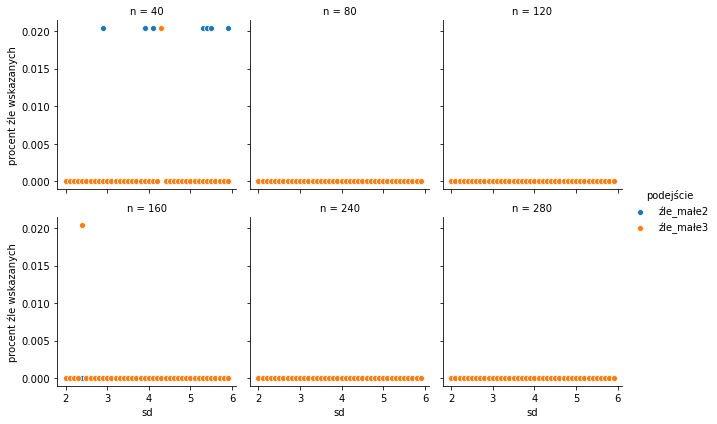

In [21]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
źle_małe = ['źle_małe2','źle_małe3']

dt = dwa_podejścia[['n','sd','źle_małe2','źle_małe3']]
dtt = dt[dt['n'].isin([40,80,120,160,240,280])]
nowe = dtt.melt(value_vars=['źle_małe2','źle_małe3'],value_name='procent źle wskazanych',id_vars = ['n','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='n',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent źle wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')